In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')

In [28]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


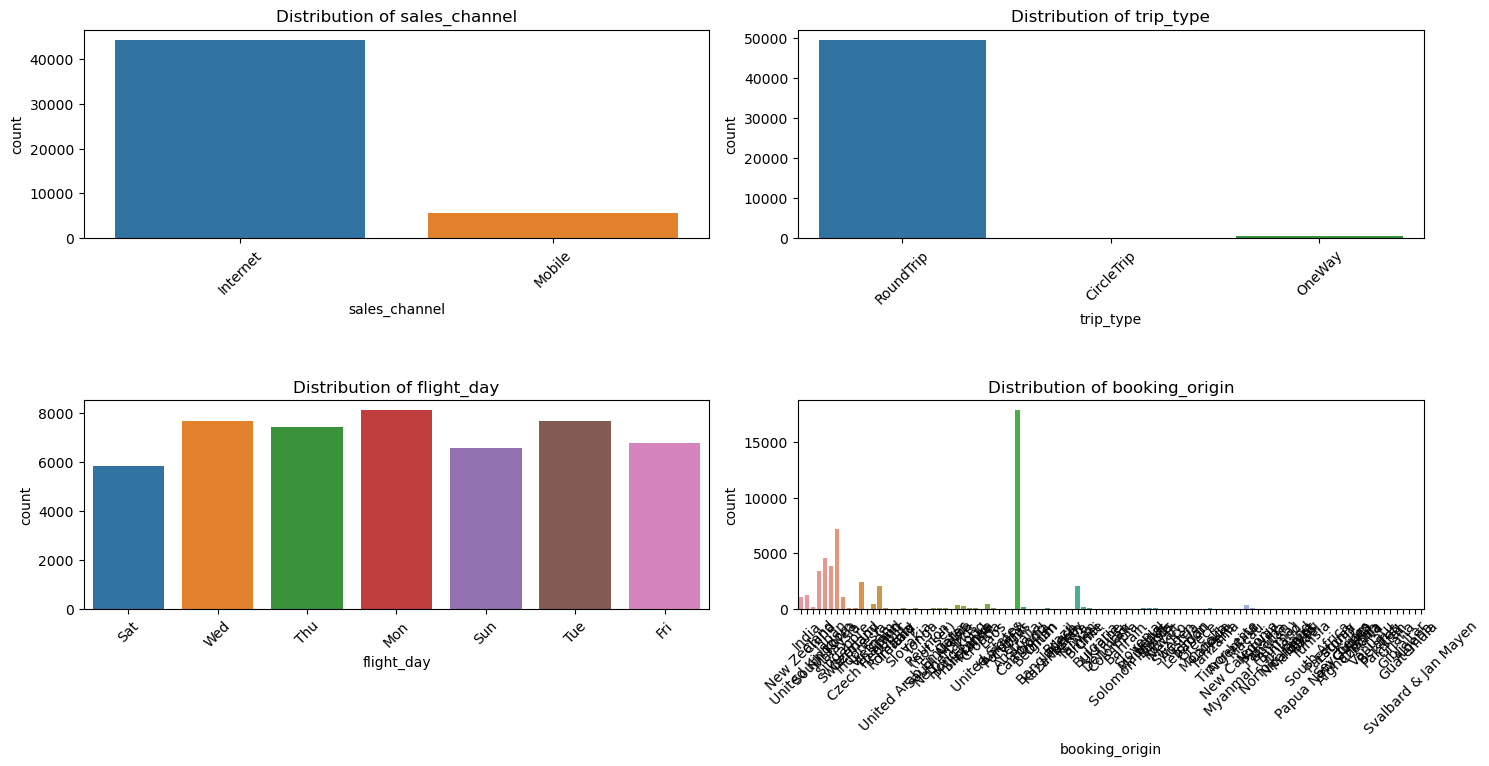

In [29]:
# Distribution of categorical features
cat_cols = ['sales_channel', 'trip_type', 'flight_day', 'booking_origin']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [31]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [32]:
mapping = {
    "RoundTrip": 0,
    "CircleTrip":1,
    "OneWay":2
}


df["trip_type"] = df["trip_type"].map(mapping)


mapping = {
    "Internet": 1,
    "Mobile":0
}

df["sales_channel"] = df["sales_channel"].map(mapping)


In [33]:
df["trip_type"].unique()

array([0, 1, 2], dtype=int64)

In [34]:

df["sales_channel"].unique()

array([1, 0], dtype=int64)

In [35]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [36]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [37]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [38]:
df.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 5.3+

In [40]:
df.shape

(50000, 14)

In [41]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [42]:
X = df.drop('booking_complete', axis =1)
y = df['booking_complete']

In [43]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.887640,0.017800,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,0.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,0.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,0.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [44]:
is_weekend = []

for i in range(len(df)):
    if df['flight_day'][i] == 6 or df['flight_day'][i] == 7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)
        
df['is_weekend'] = is_weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,1,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,1,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,1,0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,1,0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,1,0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


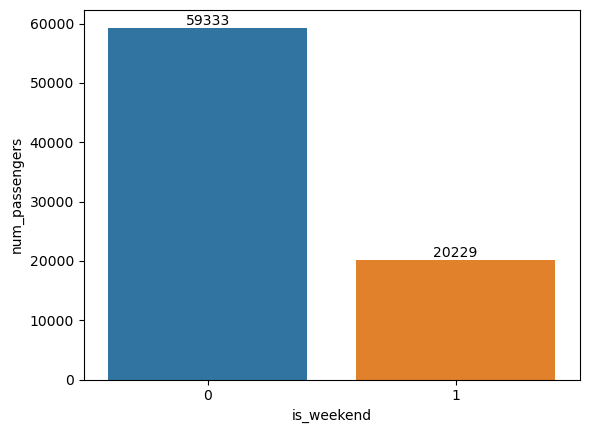

In [45]:
# Passengers that have a flight in the weekend
import matplotlib.pyplot as plt
import seaborn as sns 
 
weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
ax = sns.barplot(data=weekend, x='is_weekend', y='num_passengers')
ax.bar_label(ax.containers[0])
plt.show()

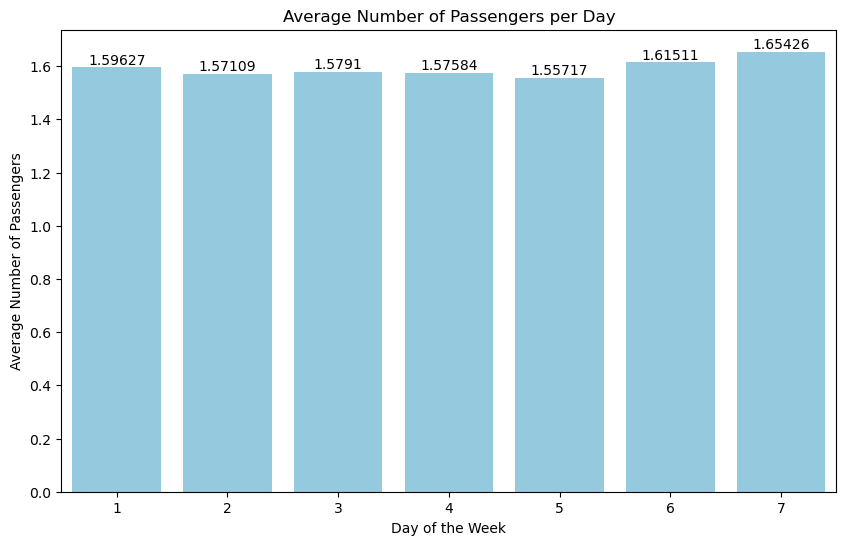

In [46]:
# plotting the average number of passengers per day
avg_passengers_per_day = df.groupby('flight_day')['num_passengers'].mean().reset_index()
plt.figure(figsize=(10, 6))
bars = sns.barplot(avg_passengers_per_day, x='flight_day', y='num_passengers', color='skyblue')
plt.title('Average Number of Passengers per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Passengers')

bars.bar_label(bars.containers[0]) 
plt.show()

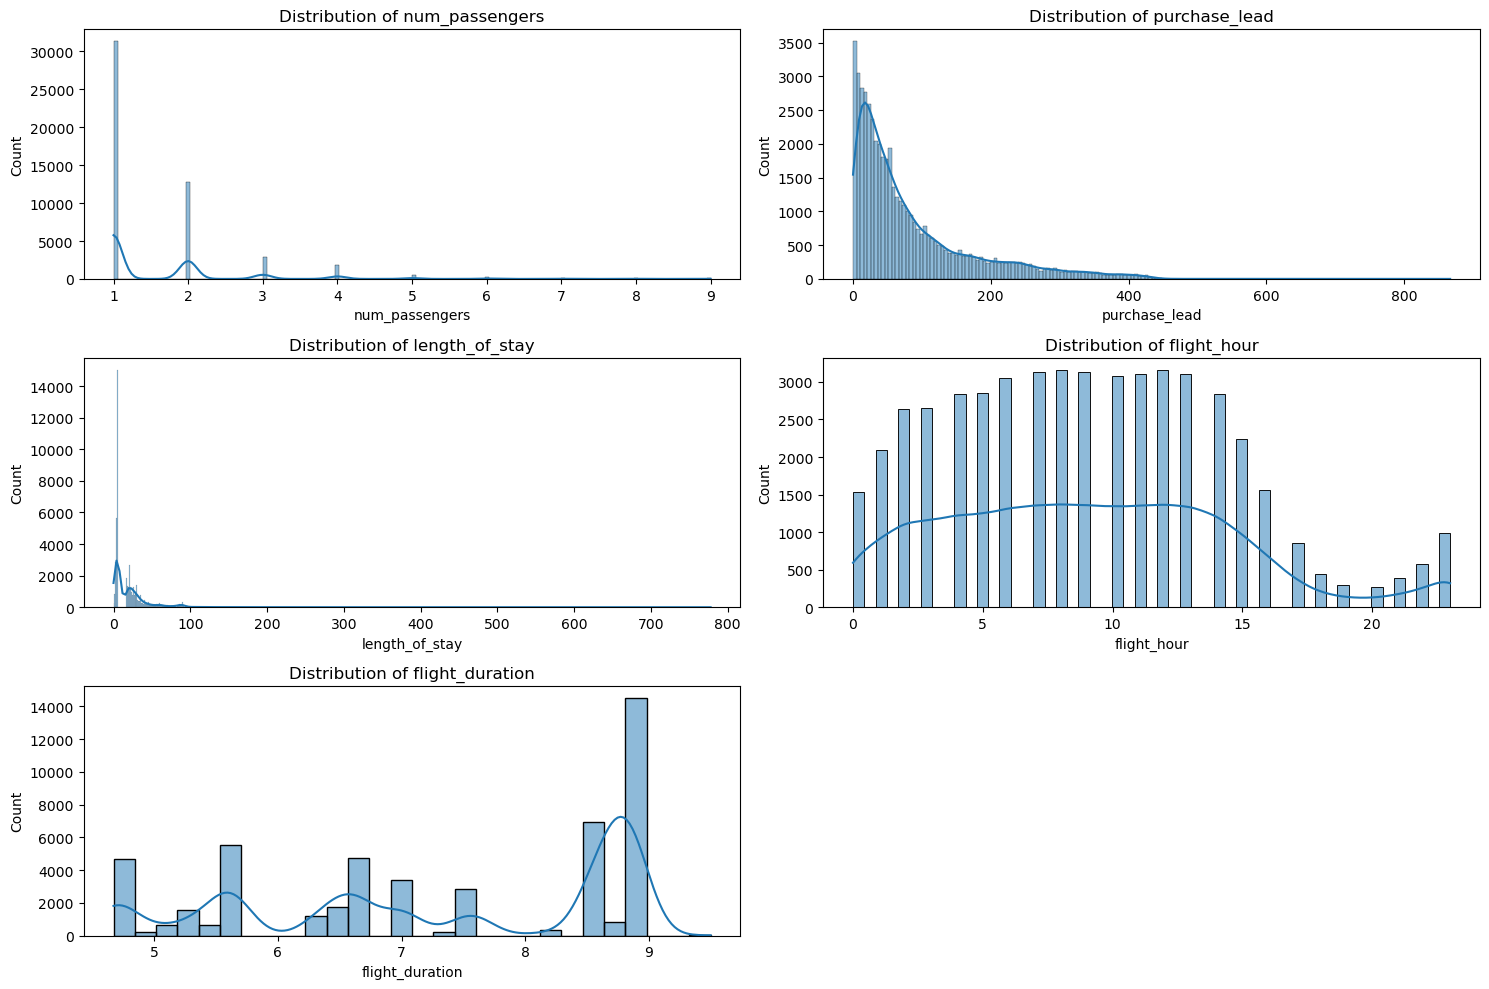

In [47]:
# Distribution of numerical features
num_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [21]:
# drop categorical data
df.drop(['booking_origin', 'route'], axis = 1, inplace=True)

In [22]:
 df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,1,0,262,19,7,6,1,0,0,5.52,0,1
1,1,1,0,112,20,3,6,0,0,0,5.52,0,1
2,2,1,0,243,22,17,3,1,1,0,5.52,0,0
3,1,1,0,96,31,4,6,0,0,1,5.52,0,1
4,2,1,0,68,22,15,3,1,0,1,5.52,0,0


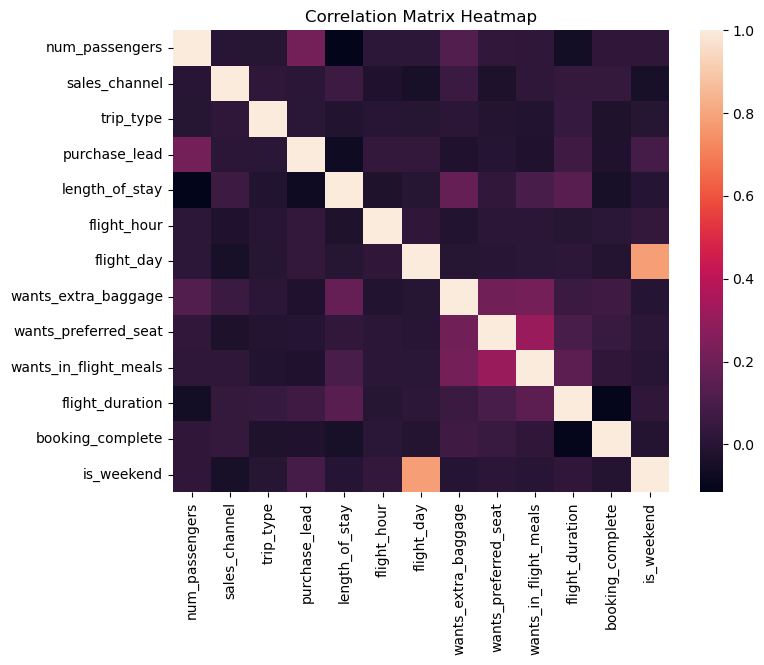

In [23]:
corr = df.corr()

plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
numeric_features = ['num_passengers','sales_channel','trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour','flight_day', 'wants_extra_baggage', 'flight_duration','wants_preferred_seat','wants_in_flight_meals' ]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Apply the preprocessing pipeline to your data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 11), (10000, 11), (40000,), (10000,))

In [26]:
y_train.value_counts(normalize = True)

booking_complete
0    0.85005
1    0.14995
Name: proportion, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
 12  is_weekend             50000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.0 MB


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix 

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred) 

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix) 

Accuracy: 0.85
Confusion Matrix:
[[8411  109]
 [1395   85]]


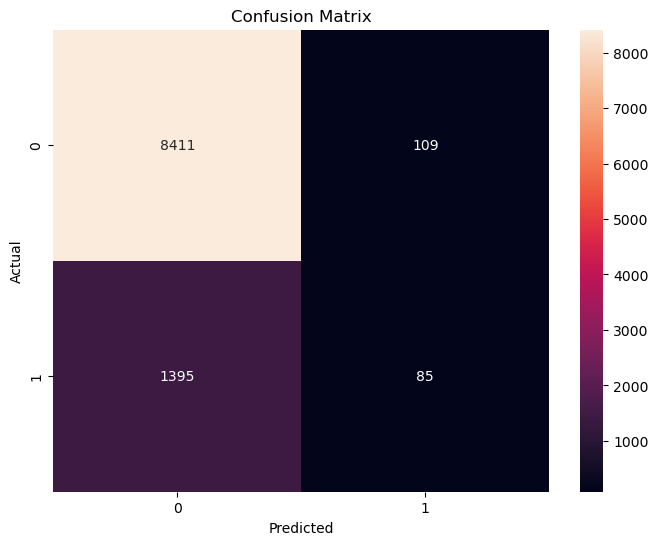

In [32]:
# Step 2: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,fmt='d')
 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=10)

array([0.8475 , 0.84775, 0.84525, 0.8475 , 0.84725, 0.8465 , 0.845  ,
       0.84525, 0.8515 , 0.8505 ])

In [34]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.44      0.06      0.10      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.52      0.51     10000
weighted avg       0.80      0.85      0.80     10000



In [35]:
importances=rf_model.feature_importances_
importances

array([0.05680578, 0.01036257, 0.00239579, 0.29281718, 0.16155194,
       0.1926277 , 0.11469573, 0.01250867, 0.11753754, 0.01455222,
       0.02414488])

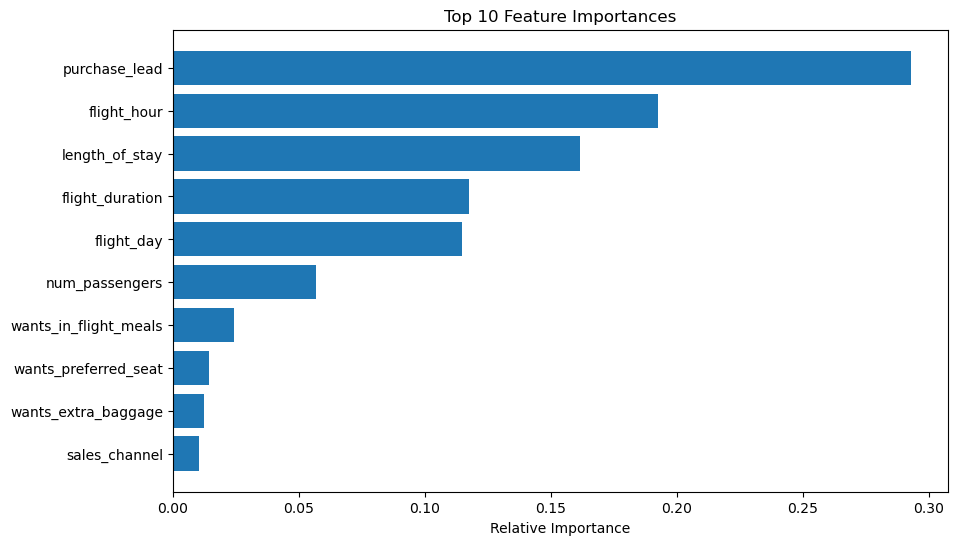

In [45]:
indices = np.argsort(importances)[-10:] 
top_feature_names = [numeric_features[i] for i in indices]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(top_feature_names, importances[indices],align='center' )
plt.xlabel('Relative Importance')
plt.show()

In [42]:
# Step 11: Save the Model
import joblib
model_filename = "best_random_forest_model.pkl"
joblib.dump(rf_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as best_random_forest_model.pkl
